In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import copy, math
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [3]:
# import the data
data = pd.read_csv("D:\Data_Science\Machine Learning\Bike Sharing\day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [4]:
print(data.shape)

(730, 16)


In [5]:
# column-wise null count
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# list of columns
print(data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [7]:
datatype = data.dtypes
categorical_columns = list(datatype[datatype == 'object'].index)
numerirical_columns = list(datatype[datatype != 'object'].index)

In [8]:
categorical_columns

['dteday']

In [9]:
numerirical_columns

['instant',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [10]:
# droping unecessary columns
UC=['instant','dteday','casual', 'registered']
data=data.drop(UC,axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [12]:
# replacing the numbers the objects

data['season']=data['season'].replace(1,'spring').replace(2,'summer').replace(3,'fall').replace(4,'winter')
data['mnth']=data['mnth'].replace(1,'Jan').replace(2,'Feb').replace(3,'Mar').replace(4,'Apr').replace(5,'May').replace(6,'Jun').replace(7,'Jul').replace(8,'Aug').replace(9,'Sep').replace(10,'Oct').replace(11,'Nov').replace(12,'Dec')
data['holiday']=data['holiday'].replace(0,'Non-Holiday').replace(1,'Holiday')
data['weekday']=data['weekday'].replace(0,'Sun').replace(1,'Mon').replace(2,'Tues').replace(3,'Wed').replace(4,'Thurs').replace(5,'Fri').replace(6,'Sat')
data['workingday']=data['workingday'].replace(0,'Non-WorkingDay').replace(1,'WorkingDay')
data['weathersit']=data['weathersit'].replace(1,'Clear').replace(2,'Cloudy').replace(3,'Light Rain').replace(4,'Heavy Rain')
data['yr']=data['yr'].replace(0,'Yr18').replace(1,'Yr19')

In [13]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,Yr18,Jan,Non-Holiday,Mon,WorkingDay,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,Yr18,Jan,Non-Holiday,Tues,WorkingDay,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,Yr18,Jan,Non-Holiday,Wed,WorkingDay,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,Yr18,Jan,Non-Holiday,Thurs,WorkingDay,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,Yr18,Jan,Non-Holiday,Fri,WorkingDay,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualising the Data

In [14]:
datatype = data.dtypes
categorical_columns = list(datatype[datatype == 'object'].index)
numerical_columns = list(datatype[datatype != 'object'].index)

In [15]:
# Import the matplotlib and seaborn packages

import matplotlib.pyplot as plt
import seaborn as sns

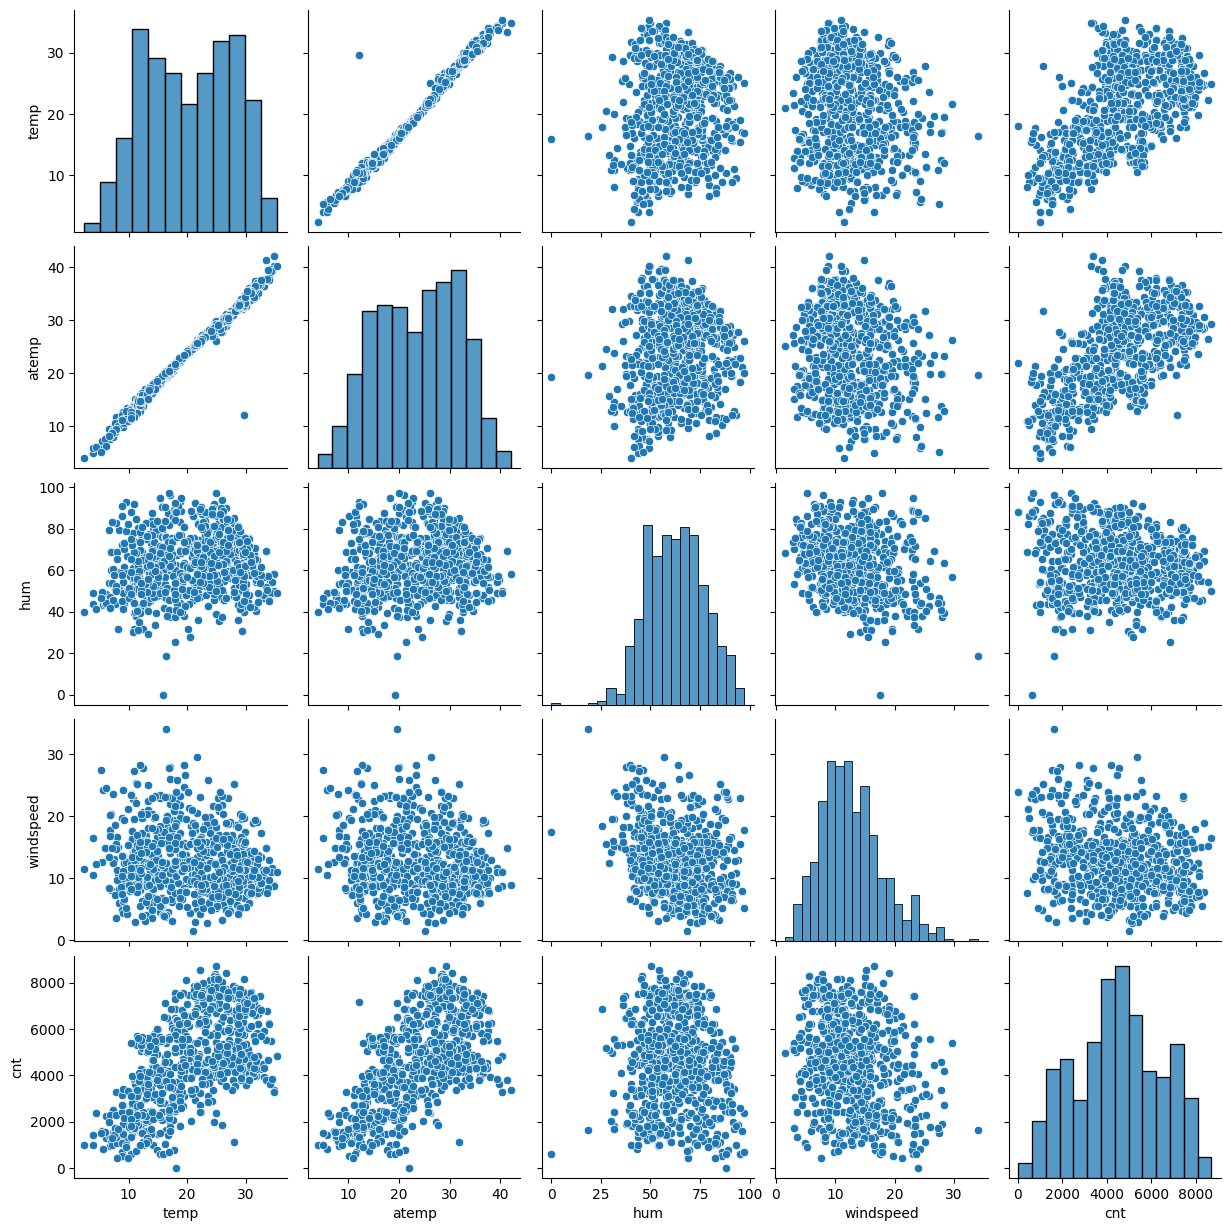

In [16]:
# Visualising Numeric Variables
sns.pairplot(data)
plt.show()

<Axes: xlabel='yr', ylabel='cnt'>

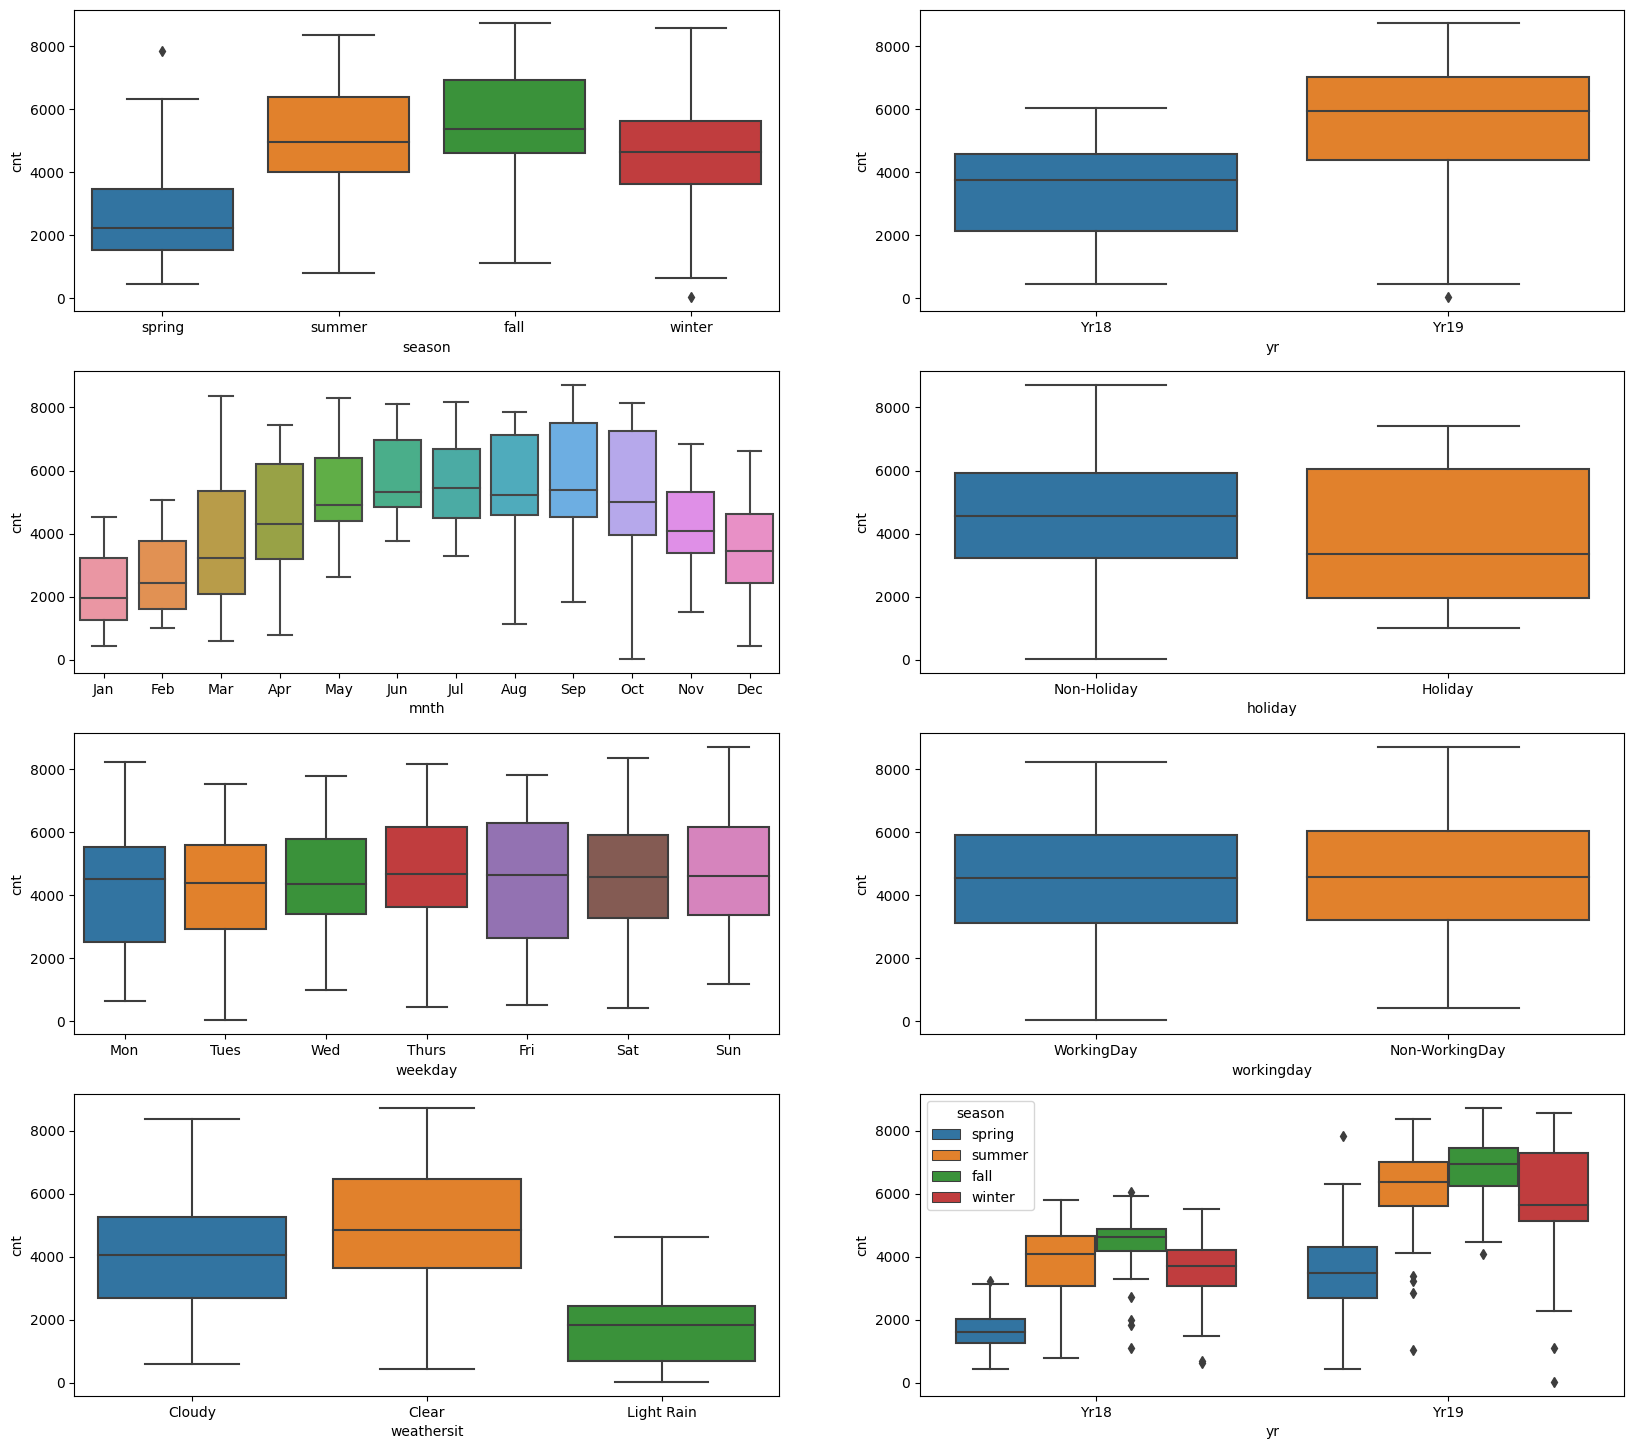

In [17]:
# Visualising Categorical Variables
plt.figure(figsize=(20, 18))

for j in categorical_columns:
    plt.subplot((len(categorical_columns)//2)+1,2,(categorical_columns.index(j)) + 1)
    sns.boxplot(x = j, y = 'cnt', data = data)
plt.subplot(4,2,8)
sns.boxplot(x = 'yr', y = 'cnt', hue = 'season', data = data)
        
        

## Some Points

- Here in the boxplot diagram I can't see any significant affects of `workingday` and `weekdays` on the **cnt**, so I will be dropping these two columns.
- Here the distrubiton of the **cnt** depands on the `season` and `mnth` are same, so I can drop any of these varible, for    business purpose I think dropping the `mnth` variable would be better.

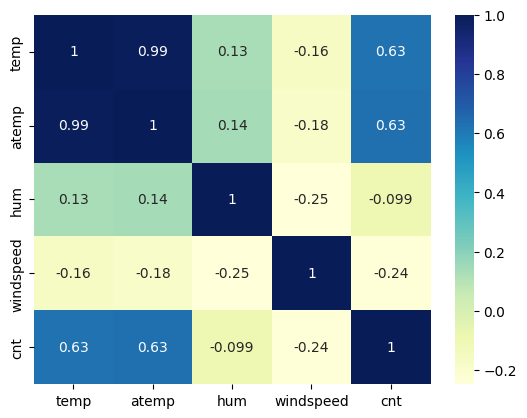

In [18]:
sns.heatmap(data[numerical_columns].corr(), annot = True, cmap="YlGnBu")
plt.show()

## Some Points

- **temp, atemp** has a high positive correlation with `cnt`, so I will drop the **atemp** column
- **windspeed** has a low negative correlation with `cnt`
- **hum** has a very low negative correlation with `cnt`,so I will drop the **hum** column



- **temp** has a very high positive correlation with **atemp**


In [19]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [20]:
drp=['workingday','weekday','mnth','atemp','hum','yr']
data=data.drop(drp,axis=1)
data.head()

,season,holiday,weathersit,temp,windspeed,cnt
0,spring,Non-Holiday,Cloudy,14.110847,10.749882,985
1,spring,Non-Holiday,Cloudy,14.902598,16.652113,801
2,spring,Non-Holiday,Clear,8.050924,16.636703,1349
3,spring,Non-Holiday,Clear,8.200000,10.739832,1562
4,spring,Non-Holiday,Clear,9.305237,12.522300,1600


### Dummy Variables
 

In [21]:
datatype = data.dtypes
categorical_columns = list(datatype[datatype == 'object'].index)
numerical_columns = list(datatype[datatype != 'object'].index)

In [22]:
dummy_data = data.copy()

In [23]:
# code for getting dummy variable

Season= pd.get_dummies(dummy_data['season'], drop_first = True)
Holiday = pd.get_dummies(dummy_data['holiday'], drop_first = True)
Weather = pd.get_dummies(dummy_data['weathersit'], drop_first = True)

### Add the results to the original Bike Sharing (Data) dataframe

In [24]:
dummy_data = pd.concat([dummy_data, Season], axis = 1)
dummy_data = pd.concat([dummy_data, Holiday], axis = 1)
dummy_data = pd.concat([dummy_data, Weather], axis = 1)

#### Drop 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', and 'weathersit' as we have created the dummies for it

In [25]:
dummy_data.drop(['season'], axis = 1, inplace = True) 
dummy_data.drop(['weathersit'], axis = 1, inplace = True)
dummy_data.drop(['holiday'], axis = 1, inplace = True)

In [26]:
dummy_data.head() 

,temp,windspeed,cnt,spring,summer,winter,Non-Holiday,Cloudy,Light Rain
0,14.110847,10.749882,985,True,False,False,True,True,False
1,14.902598,16.652113,801,True,False,False,True,True,False
2,8.050924,16.636703,1349,True,False,False,True,False,False
3,8.200000,10.739832,1562,True,False,False,True,False,False
4,9.305237,12.522300,1600,True,False,False,True,False,False


### Rescaling the Features 

I will use MinMax scaling.

X_scaled = (X - X_min) / (X_max - X_min)

In [27]:
dummy_data.columns

Index(['temp', 'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Non-Holiday',
       'Cloudy', 'Light Rain'],
      dtype='object')

In [28]:
scaled_data = dummy_data.copy()

In [29]:
scl = ['temp', 'windspeed', 'cnt']

In [30]:
for i in scl:
    scaled_data[i] = (scaled_data[i] - np.min(data[i])) / (np.max(data[i]) - np.min(data[i]))  

In [31]:
scaled_data.head() 

,temp,windspeed,cnt,spring,summer,winter,Non-Holiday,Cloudy,Light Rain
0,0.355170,0.284606,0.110792,True,False,False,True,True,False
1,0.379232,0.466215,0.089623,True,False,False,True,True,False
2,0.171000,0.465740,0.152669,True,False,False,True,False,False
3,0.175530,0.284297,0.177174,True,False,False,True,False,False
4,0.209120,0.339143,0.181546,True,False,False,True,False,False


In [32]:
def restore(scaled_data):
    restored_data = (scaled_data * (np.max(data['cnt']) - np.min(data['cnt']))) + np.min(data['cnt'])
    return restored_data

In [33]:
restore(scaled_data['cnt']).head()

0     985.0
1     801.0
2    1349.0
3    1562.0
4    1600.0
Name: cnt, dtype: float64

In [34]:
scaled_data.columns

Index(['temp', 'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Non-Holiday',
       'Cloudy', 'Light Rain'],
      dtype='object')

In [35]:
dumm = ['spring', 'summer', 'winter',
       'Non-Holiday', 'Cloudy', 'Light Rain']

In [36]:
for i in dumm:
    scaled_data[i]=scaled_data[i].replace(True,1).replace(False,0) 

In [37]:
scaled_data.head()

,temp,windspeed,cnt,spring,summer,winter,Non-Holiday,Cloudy,Light Rain
0,0.355170,0.284606,0.110792,1,0,0,1,1,0
1,0.379232,0.466215,0.089623,1,0,0,1,1,0
2,0.171000,0.465740,0.152669,1,0,0,1,0,0
3,0.175530,0.284297,0.177174,1,0,0,1,0,0
4,0.209120,0.339143,0.181546,1,0,0,1,0,0


## Splitting the Data into Training and Testing Sets

In [38]:
shuffled_data = scaled_data.sample(frac=1, random_state=100)

shuffled_data.head()

,temp,windspeed,cnt,spring,summer,winter,Non-Holiday,Cloudy,Light Rain
184,0.831783,0.121812,0.692706,0,0,0,0,1,0
535,0.901354,0.188468,0.712034,0,1,0,1,0,0
299,0.511964,0.361537,0.303382,0,0,1,1,1,0
221,0.881625,0.366681,0.547400,0,0,0,1,0,0
152,0.817246,0.556403,0.569029,0,1,0,1,0,0


In [39]:
train_size = int(0.9 * len(shuffled_data))
test_size = len(shuffled_data) - train_size

print(train_size,test_size)

657 73


In [40]:
df_train = shuffled_data[:train_size]
df_test = shuffled_data[train_size:]

In [41]:
df_train.head()

,temp,windspeed,cnt,spring,summer,winter,Non-Holiday,Cloudy,Light Rain
184,0.831783,0.121812,0.692706,0,0,0,0,1,0
535,0.901354,0.188468,0.712034,0,1,0,1,0,0
299,0.511964,0.361537,0.303382,0,0,1,1,1,0
221,0.881625,0.366681,0.547400,0,0,0,1,0,0
152,0.817246,0.556403,0.569029,0,1,0,1,0,0


In [42]:
df_test.head()

,temp,windspeed,cnt,spring,summer,winter,Non-Holiday,Cloudy,Light Rain
214,0.838014,0.233350,0.408652,0,0,0,1,1,0
38,0.201489,0.700017,0.173493,1,0,0,1,0,0
36,0.282483,0.246166,0.184192,1,0,0,1,0,0
180,0.794402,0.335869,0.631960,0,0,0,1,0,0
176,0.773634,0.148724,0.607800,0,0,0,1,0,0


In [43]:
print(df_train.shape,df_test.shape)

(657, 9) (73, 9)


### Dividing into X and Y sets for the model building

In [44]:
y_train = df_train.pop('cnt')
X_train = df_train

In [45]:
y_test = df_test.pop('cnt')
X_test = df_test

In [46]:
X_train.head()

,temp,windspeed,spring,summer,winter,Non-Holiday,Cloudy,Light Rain
184,0.831783,0.121812,0,0,0,0,1,0
535,0.901354,0.188468,0,1,0,1,0,0
299,0.511964,0.361537,0,0,1,1,1,0
221,0.881625,0.366681,0,0,0,1,0,0
152,0.817246,0.556403,0,1,0,1,0,0


In [47]:
y_train.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [48]:
np.array(X_train)[0]

array([0.83178337, 0.12181199, 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        ])

## Building our model



##### Step 1: Initializing parameters

In [49]:
X_train.shape

(657, 8)

In [50]:
def initialization(x):
    m = x.shape[1]
    w = np.random.random(size=(m))
    b = 0.
    return w,b

In [51]:
initial_w , initial_b = initialization(X_train)

In [52]:
initial_w

array([0.82982764, 0.92212018, 0.5183363 , 0.87580871, 0.12050037,
       0.51965021, 0.29749865, 0.25373681])

In [53]:
initial_b

0.0

In [54]:
initial_w.shape

(8,)

##### Step 2: Prediction

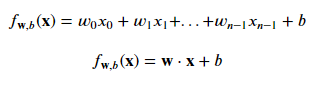

In [55]:
X_train.shape

(657, 8)

In [56]:
initial_w.shape

(8,)

In [57]:
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p    

##### Step 3: Compute Cost With Multiple Variables

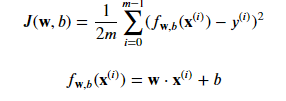

In [58]:
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2       
    #cost = cost / (2 * m)                         
    return cost

In [59]:
cost = compute_cost(np.array(X_train), np.array(y_train), initial_w, initial_b)
cost

1174.9781721228042

##### Step 4: Gradient Descent

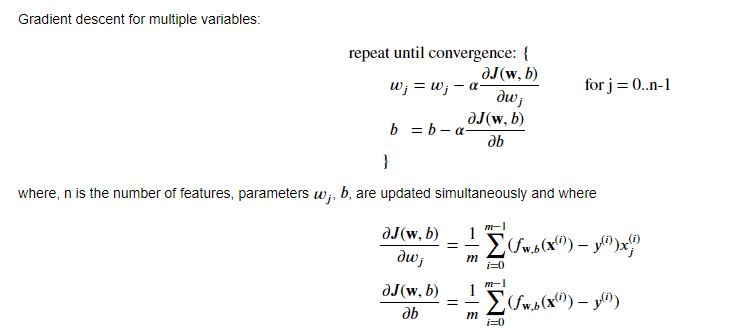

In [60]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [61]:
tmp_dj_db, tmp_dj_dw = compute_gradient(np.array(X_train),np.array(y_train), initial_w, initial_b)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 1.244316823643572
dj_dw at initial w,b: 
 [0.66168154 0.46761352 0.3495463  0.45465285 0.20938122 1.22068866
 0.50297722 0.04988185]


In [62]:
initial_w

array([0.82982764, 0.92212018, 0.5183363 , 0.87580871, 0.12050037,
       0.51965021, 0.29749865, 0.25373681])

In [63]:
tmp_dj_dw

array([0.66168154, 0.46761352, 0.3495463 , 0.45465285, 0.20938122,
       1.22068866, 0.50297722, 0.04988185])

In [64]:
updated_w = initial_w - (.005 * tmp_dj_dw)
updated_w

array([0.82651923, 0.91978212, 0.51658856, 0.87353545, 0.11945346,
       0.51354677, 0.29498376, 0.2534874 ])

In [65]:
updated_b = initial_b - (.005 * tmp_dj_db)
updated_b

-0.0062215841182178605

In [66]:
compute_cost(np.array(X_train), np.array(y_train), updated_w, updated_b)

1146.7645847454842

In [67]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    J_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        
        dj_db,dj_dw = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        
        if i% math.ceil(num_iters / 50) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history 

In [68]:
# hyperparameters
iterations = 20000
alpha = .005

In [69]:
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(np.array(X_train), np.array(y_train), initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)

Iteration    0: Cost  1146.76   
Iteration  400: Cost    71.28   
Iteration  800: Cost    49.29   
Iteration 1200: Cost    38.87   
Iteration 1600: Cost    33.27   
Iteration 2000: Cost    29.83   
Iteration 2400: Cost    27.48   
Iteration 2800: Cost    25.74   
Iteration 3200: Cost    24.38   
Iteration 3600: Cost    23.29   
Iteration 4000: Cost    22.40   
Iteration 4400: Cost    21.64   
Iteration 4800: Cost    21.00   
Iteration 5200: Cost    20.45   
Iteration 5600: Cost    19.97   
Iteration 6000: Cost    19.55   
Iteration 6400: Cost    19.17   
Iteration 6800: Cost    18.84   
Iteration 7200: Cost    18.55   
Iteration 7600: Cost    18.28   
Iteration 8000: Cost    18.04   
Iteration 8400: Cost    17.83   
Iteration 8800: Cost    17.63   
Iteration 9200: Cost    17.45   
Iteration 9600: Cost    17.29   
Iteration 10000: Cost    17.14   
Iteration 10400: Cost    17.01   
Iteration 10800: Cost    16.88   
Iteration 11200: Cost    16.77   
Iteration 11600: Cost    16.66   
Itera

In [70]:
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

b,w found by gradient descent: -0.11,[ 0.74531443  0.00149854  0.05612475  0.09055183  0.1924388   0.17055209
 -0.06299543 -0.29454127] 


In [71]:
X_train.columns

Index(['temp', 'windspeed', 'spring', 'summer', 'winter', 'Non-Holiday',
       'Cloudy', 'Light Rain'],
      dtype='object')

In [72]:
X_train.shape

(657, 8)

In [73]:
w_final.shape

(8,)

## Evaluation

In [74]:
def R_squared(X,y,w,b):
    m = X.shape[0]
    RSS = 0.0
    for i in range(m): 
        f_wb_i = np.dot(X[i], w) + b
        RSS = RSS + (f_wb_i - y[i])**2 
    
    TSS = np.sum(np.square(y_train - np.mean(y_train)))
    
    R_squared = 1 - (RSS / TSS)
        
    return round(R_squared,2)

In [87]:
R_squared(np.array(X_train),np.array(y_train),w_final,b_final) 

0.51

<Axes: xlabel='cnt', ylabel='Density'>

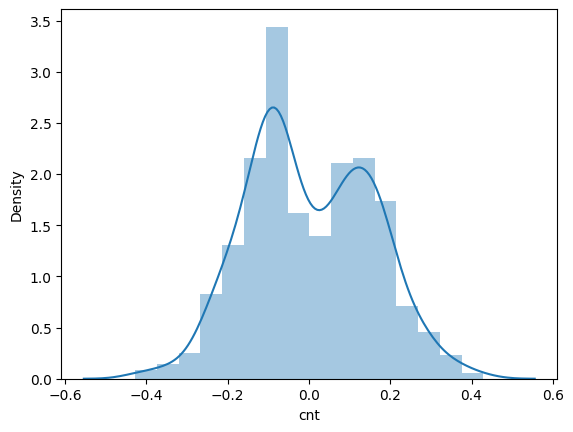

In [75]:
f_wb_train = predict(np.array(X_train),w_final,b_final)
sns.distplot((y_train - f_wb_train)) 

In [79]:
restored_y_train = restore(y_train)
restored_y_train[:5]

184    6043.0
535    6211.0
299    2659.0
221    4780.0
152    4968.0
Name: cnt, dtype: float64

In [76]:
train_predictions = pd.DataFrame(restore(predict(np.array(X_train),w_final,b_final)))
train_predictions[:5]

,0
0,3903.629232
1,7172.266655
2,4989.989320
3,6259.703590
4,6632.182524


In [81]:
train_predictions.set_index(X_train.index, inplace=True)

In [82]:
train_predictions[:5]

,0
184,3903.629232
535,7172.266655
299,4989.989320
221,6259.703590
152,6632.182524


<Axes: xlabel='cnt', ylabel='Density'>

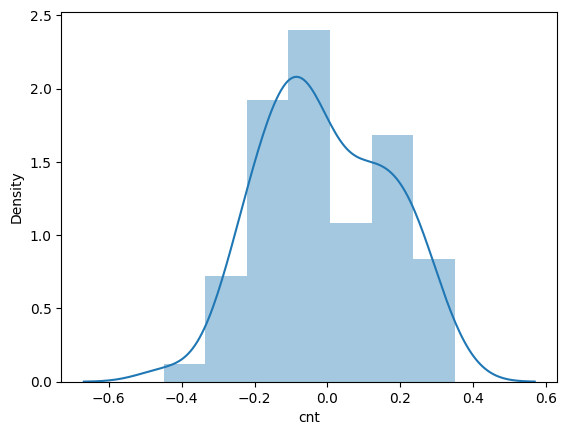

In [77]:
f_wb_test = predict(np.array(X_test),w_final,b_final)
sns.distplot((y_test - f_wb_test)) 

In [80]:
restored_y_test = restore(y_test)
restored_y_test[:5] 

214    3574.0
38     1530.0
36     1623.0
180    5515.0
176    5305.0
Name: cnt, dtype: float64

In [78]:
test_predictions = pd.DataFrame(restore(predict(np.array(X_test),w_final,b_final)))
test_predictions[:5]

,0
0,5427.882034
1,2345.775313
2,2864.559754
3,5694.245018
4,5557.267262


In [83]:
test_predictions.set_index(X_test.index, inplace=True)

In [84]:
test_predictions[:5]

,0
214,5427.882034
38,2345.775313
36,2864.559754
180,5694.245018
176,5557.267262


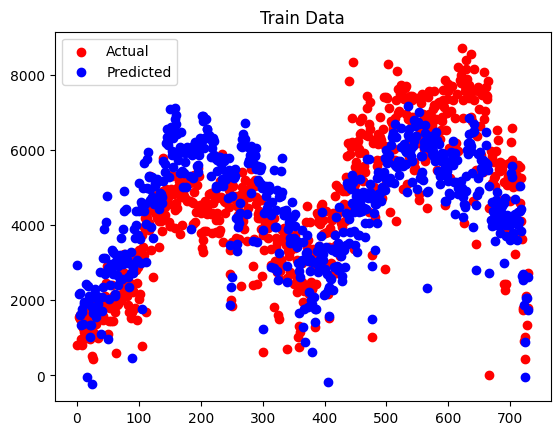

In [85]:
plt.scatter(restored_y_train.index, restored_y_train,color='red', label='Actual')
plt.scatter(train_predictions.index, train_predictions,color='blue', label='Predicted')
plt.title('Train Data')
plt.legend()
plt.show()

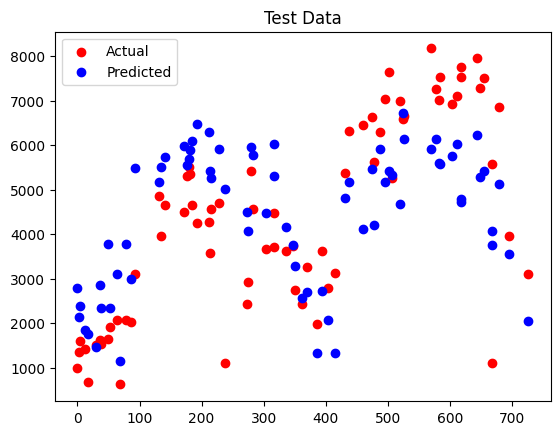

In [88]:
plt.scatter(restored_y_test.index, restored_y_test,color='red', label='Actual') 
plt.scatter(test_predictions.index, test_predictions,color='blue', label='Predicted')
plt.title('Test Data')
plt.legend()
plt.show() 

# Using Library

In [89]:
import statsmodels
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
X_train_model= sm.add_constant(X_train)

In [92]:
lm = LinearRegression()

In [93]:
lm.fit(X_train, y_train )

LinearRegression()

In [94]:
print(lm.coef_)

[ 0.5095472  -0.11595879 -0.0692241   0.03729055  0.09420894  0.08634373
 -0.07132859 -0.3173665 ]


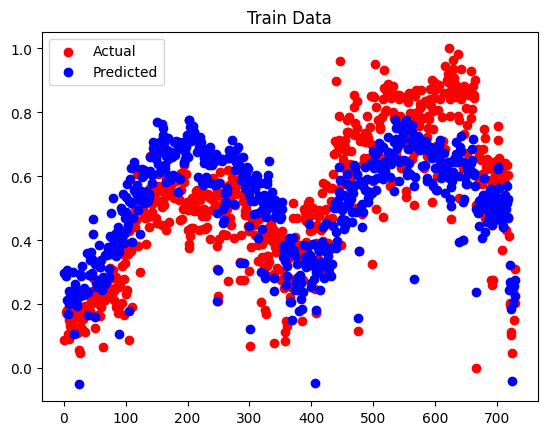

In [95]:
train_predictions = lm.predict(X_train) 
plt.scatter(y_train.index, y_train,color='red', label='Actual')  
plt.scatter(y_train.index, train_predictions,color='blue', label='Predicted')
plt.title('Train Data')
plt.legend()
plt.show() 

<Axes: xlabel='cnt', ylabel='Density'>

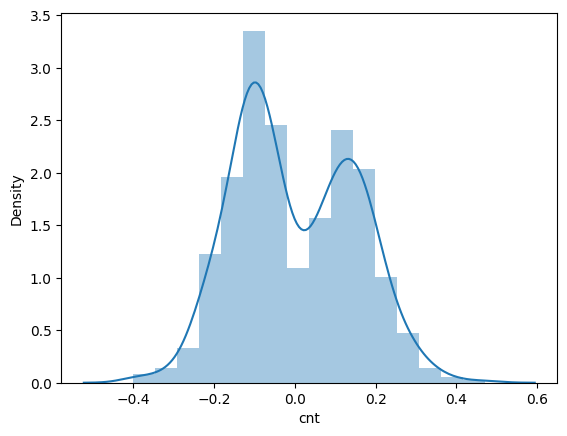

In [96]:
sns.distplot((y_train-train_predictions))

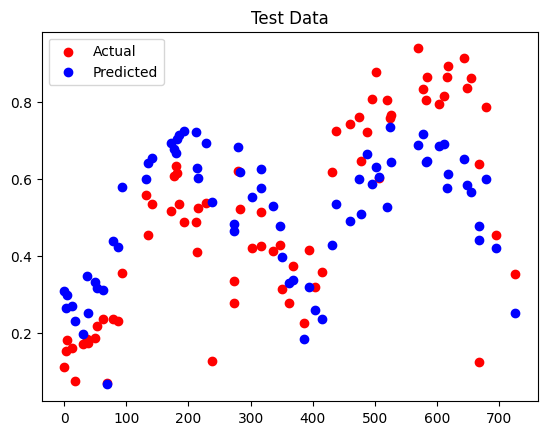

In [97]:
test_predictions = lm.predict(X_test) 
plt.scatter(y_test.index, y_test,color='red', label='Actual') 
plt.scatter(y_test.index, test_predictions,color='blue', label='Predicted')
plt.title('Test Data')
plt.legend()
plt.show() 

<Axes: xlabel='cnt', ylabel='Density'>

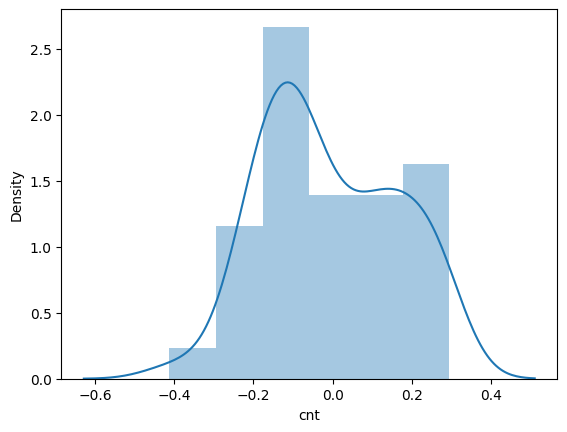

In [98]:
sns.distplot((y_test-test_predictions))

In [99]:
from sklearn.metrics import r2_score

In [100]:
r2_train = round(r2_score(y_train, train_predictions),2)
r2_train

0.54

In [101]:
r2_test = round(r2_score(y_test, test_predictions),2)
r2_test  

0.54

# Comments:
- Not a good model
- Need improvement 
- Try polynomial regression